In [1]:
# This notebook loads tracks from a stack, finds where the tracks cross the rows,
# crops out images before and after the crossing. It saves the images in a girder
# lightbox in the series folder.

from __future__ import division, print_function
from ipywidgets import interact, interactive, fixed, interact_manual    
import ipywidgets as widgets
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy as sp
from scipy import ndimage
from IPython.core.debugger import set_trace
import cv2
import sys
from pprint import pprint
from random import randint
from nuclei.foci import *
import nuclei.girder as g
import nuclei.girder.time_lapse_data as reader

plt.rcParams['image.cmap'] = 'gist_earth'
matplotlib.rcParams['figure.figsize'] = (11.0, 11.0)


# input parameters
czi_folder_id = "5ada43f41fbb9005ff7260eb"
series_idx = 7




In [9]:
# This block sets up the reader of a czi folder.
# it then detects rows in the brightfield channel of an image.

# Setup the reader.
source = reader.time_lapse_data()
source.load(czi_folder_id) 
num_series = source.get_number_of_series()
num_time_steps = source.get_series_length(series_idx)
im, item_obj = source.get_image(series_idx,0)

# detect rows of circles.
rows = compute_rows(im)

# draw the row as a santity check
for row in rows:
    cv2.line(im,(10,int(10*row[0]+row[1])),(2000,int(2000*row[0]+row[1])),(255,0,0),5)

plt.imshow(im)



9, 13


In [ ]:
# Load the tracks
# First get the stack id from the source.
stack = source.get_series_stack(series_idx)

# Get the tracks from the stack item
annotation = g.Annotation("tracks")
annotation.LoadFromItem(stack['_id'])

print(annotation)


In [ ]:
# find the crossings of the tracks.

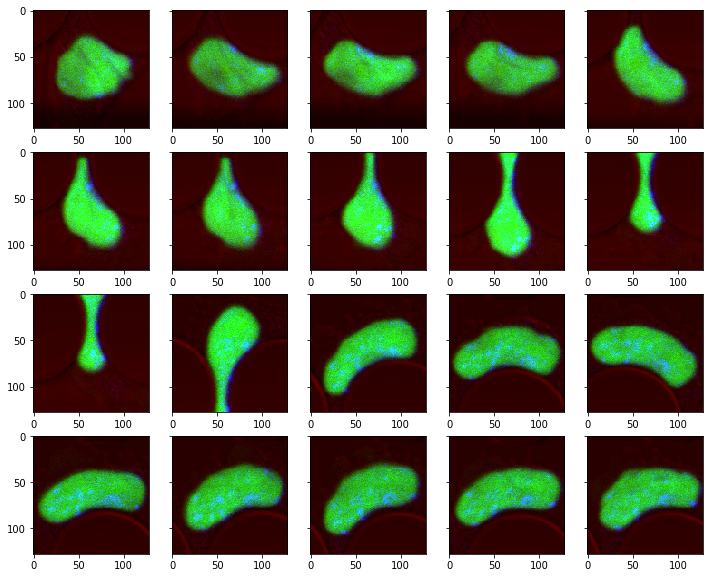

In [19]:

# For each crossing, from 10 frame before and 10 frame after.
# the frame number is in the z index of the track point.

images = []


for i in range(10):
    # Assume the last track point is from the image time step.
    pt_idx = len(after_track) - i - 1
    if pt_idx >= 0:
        x,y,z = after_track[pt_idx]
        im, item_obj = source.get_image(series_idx, after_time-i)
        im = im[y-64:y+64, x-64:x+64, ...]
        images.append(im)
        #print((x,y))

for i in range(10):
    # Assume the last track point is from the image time step.
    pt_idx = len(before_track) - i - 1
    if pt_idx >= 0:
        x,y,z = before_track[pt_idx]
        im, item_obj = source.get_image(series_idx, before_time-i)
        im = im[y-64:y+64, x-64:x+64, ...]
        images.append(im)
        #print((x,y))

images.reverse()
        
        
        
fig, ax = plt.subplots(4,5, sharey=True, figsize=(12,10))
ax[0][0].imshow(images[0], aspect="auto")
ax[0][1].imshow(images[1], aspect="auto")
ax[0][2].imshow(images[2], aspect="auto")
ax[0][3].imshow(images[3], aspect="auto")
ax[0][4].imshow(images[4], aspect="auto")
ax[1][0].imshow(images[5], aspect="auto")
ax[1][1].imshow(images[6], aspect="auto")
ax[1][2].imshow(images[7], aspect="auto")
ax[1][3].imshow(images[8], aspect="auto")
ax[1][4].imshow(images[9], aspect="auto")
ax[2][0].imshow(images[10], aspect="auto")
ax[2][1].imshow(images[11], aspect="auto")
ax[2][2].imshow(images[12], aspect="auto")
ax[2][3].imshow(images[13], aspect="auto")
ax[2][4].imshow(images[14], aspect="auto")
ax[3][0].imshow(images[15], aspect="auto")
ax[3][1].imshow(images[16], aspect="auto")
ax[3][2].imshow(images[17], aspect="auto")
ax[3][3].imshow(images[18], aspect="auto")
ax[3][4].imshow(images[19], aspect="auto")

